In [38]:
from lifelines.datasets import load_leukemia
from lifelines import KaplanMeierFitter
%matplotlib inline
from matplotlib import pyplot as plt

In [43]:
df = load_leukemia()
print df.head()

    t  status  sex  logWBC  Rx
0  35       0    1    1.45   0
1  34       0    1    1.47   0
2  32       0    1    2.20   0
3  32       0    1    2.53   0
4  25       0    1    1.78   0


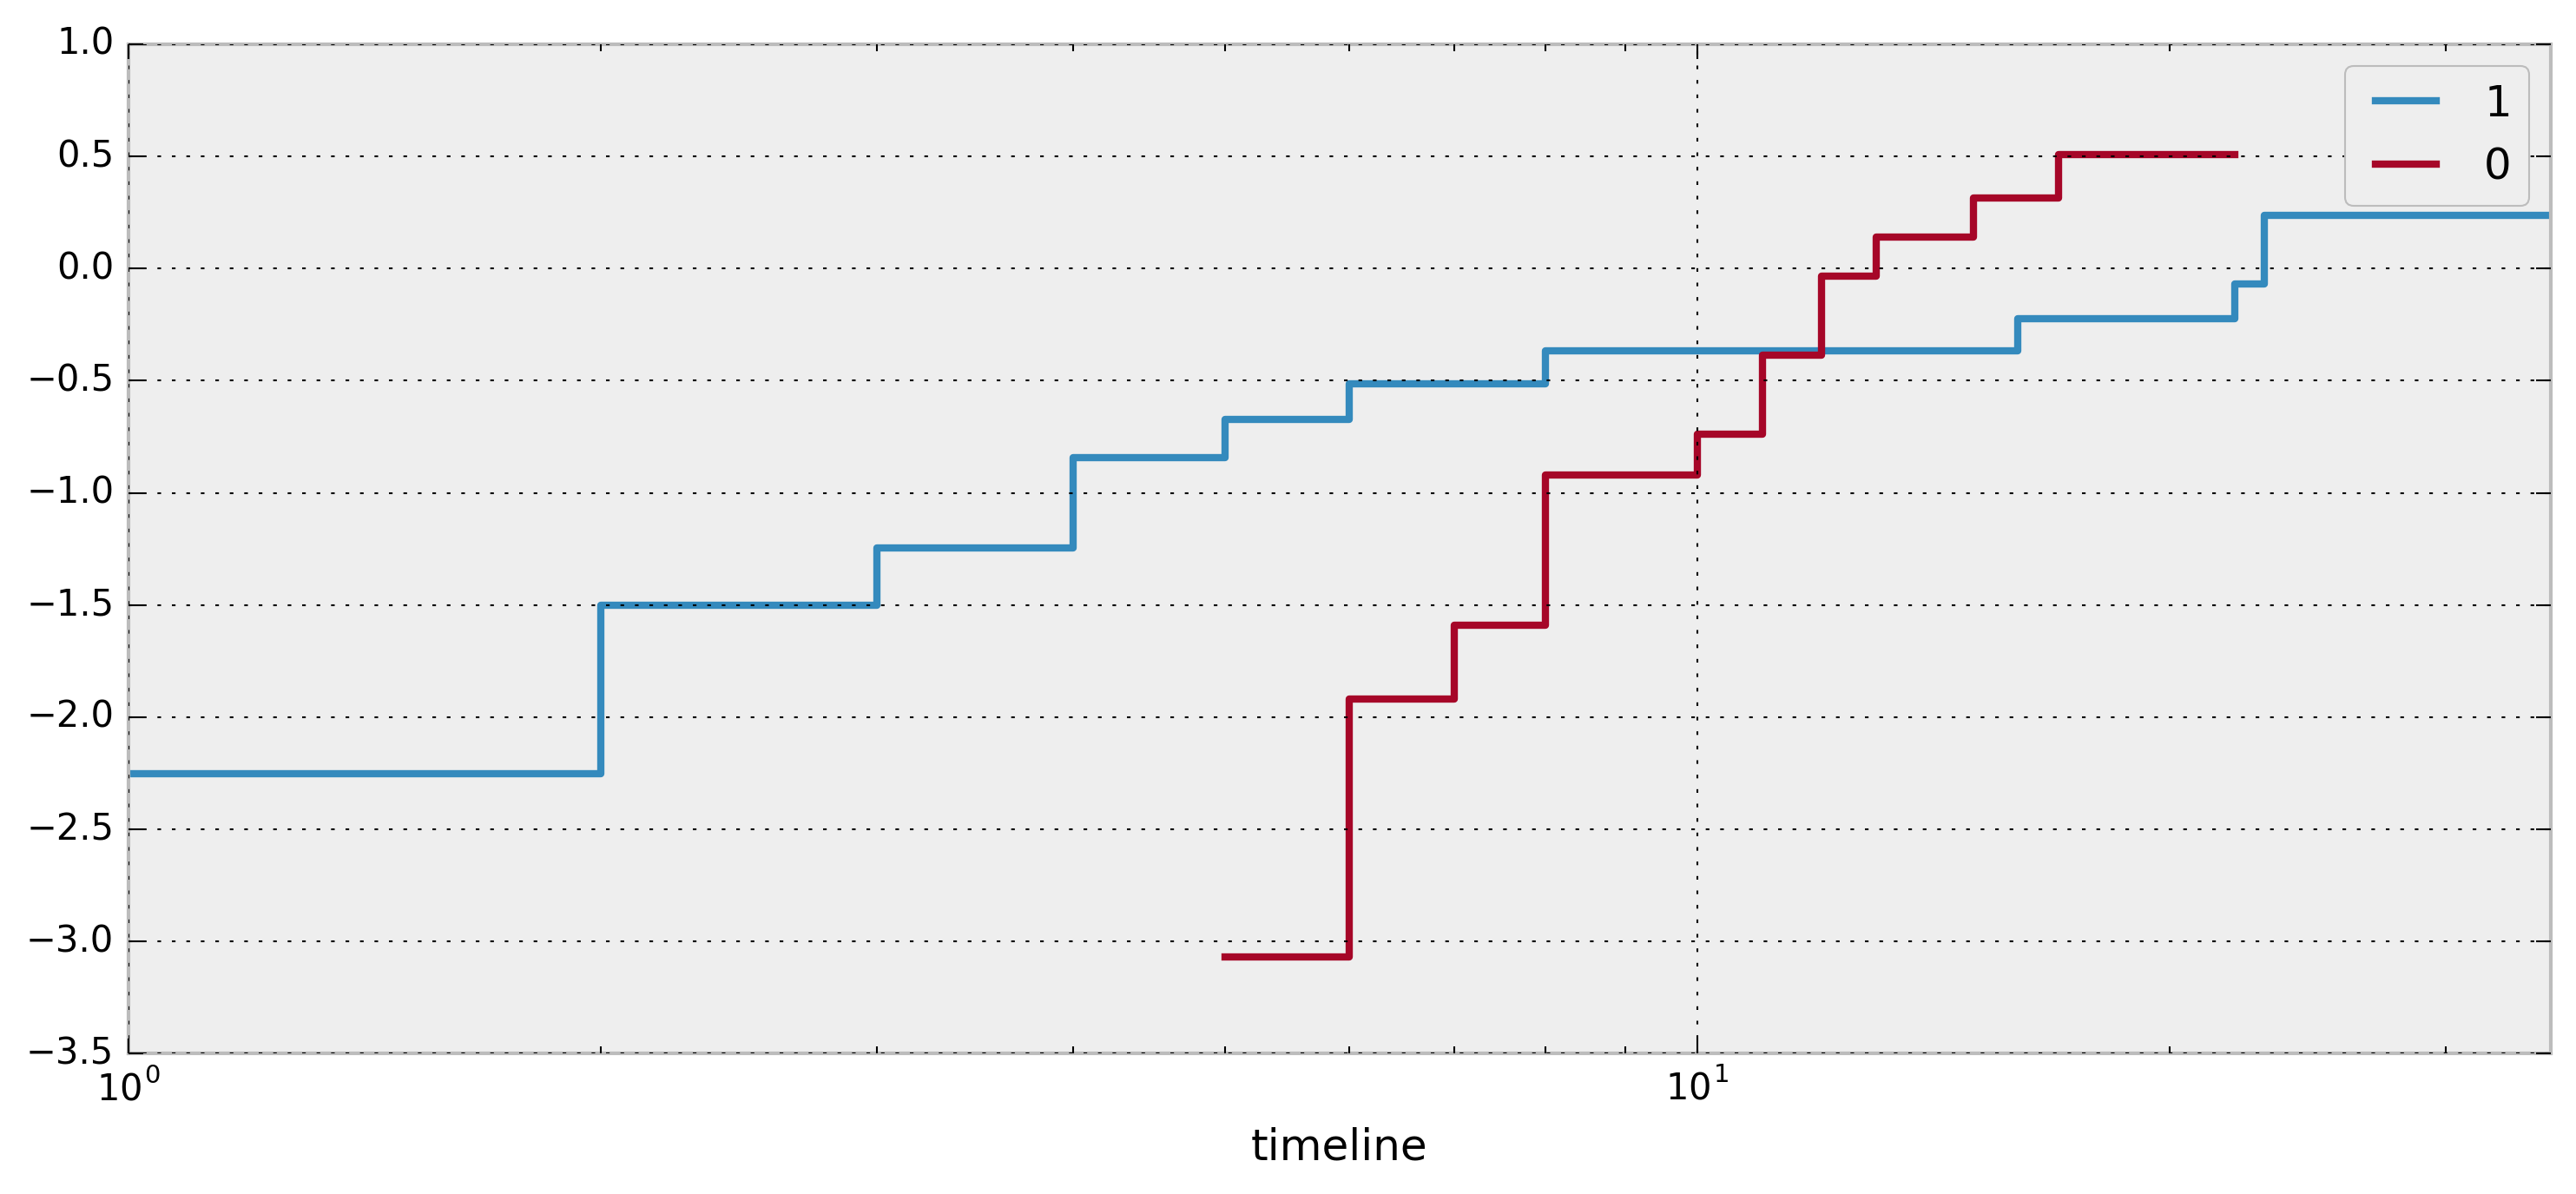

In [44]:
kmf = KaplanMeierFitter()

ix = df.sex == 1

kmf.fit(df.ix[ix]['t'], df.ix[ix]['status'], label='1')
ax = kmf.plot_loglogs(figsize=(12,5))

kmf.fit(df.ix[~ix]['t'], df.ix[~ix]['status'], label='0')
ax = kmf.plot_loglogs(ax=ax)

In [48]:
from lifelines.datasets import load_dd
df = load_dd()
df.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


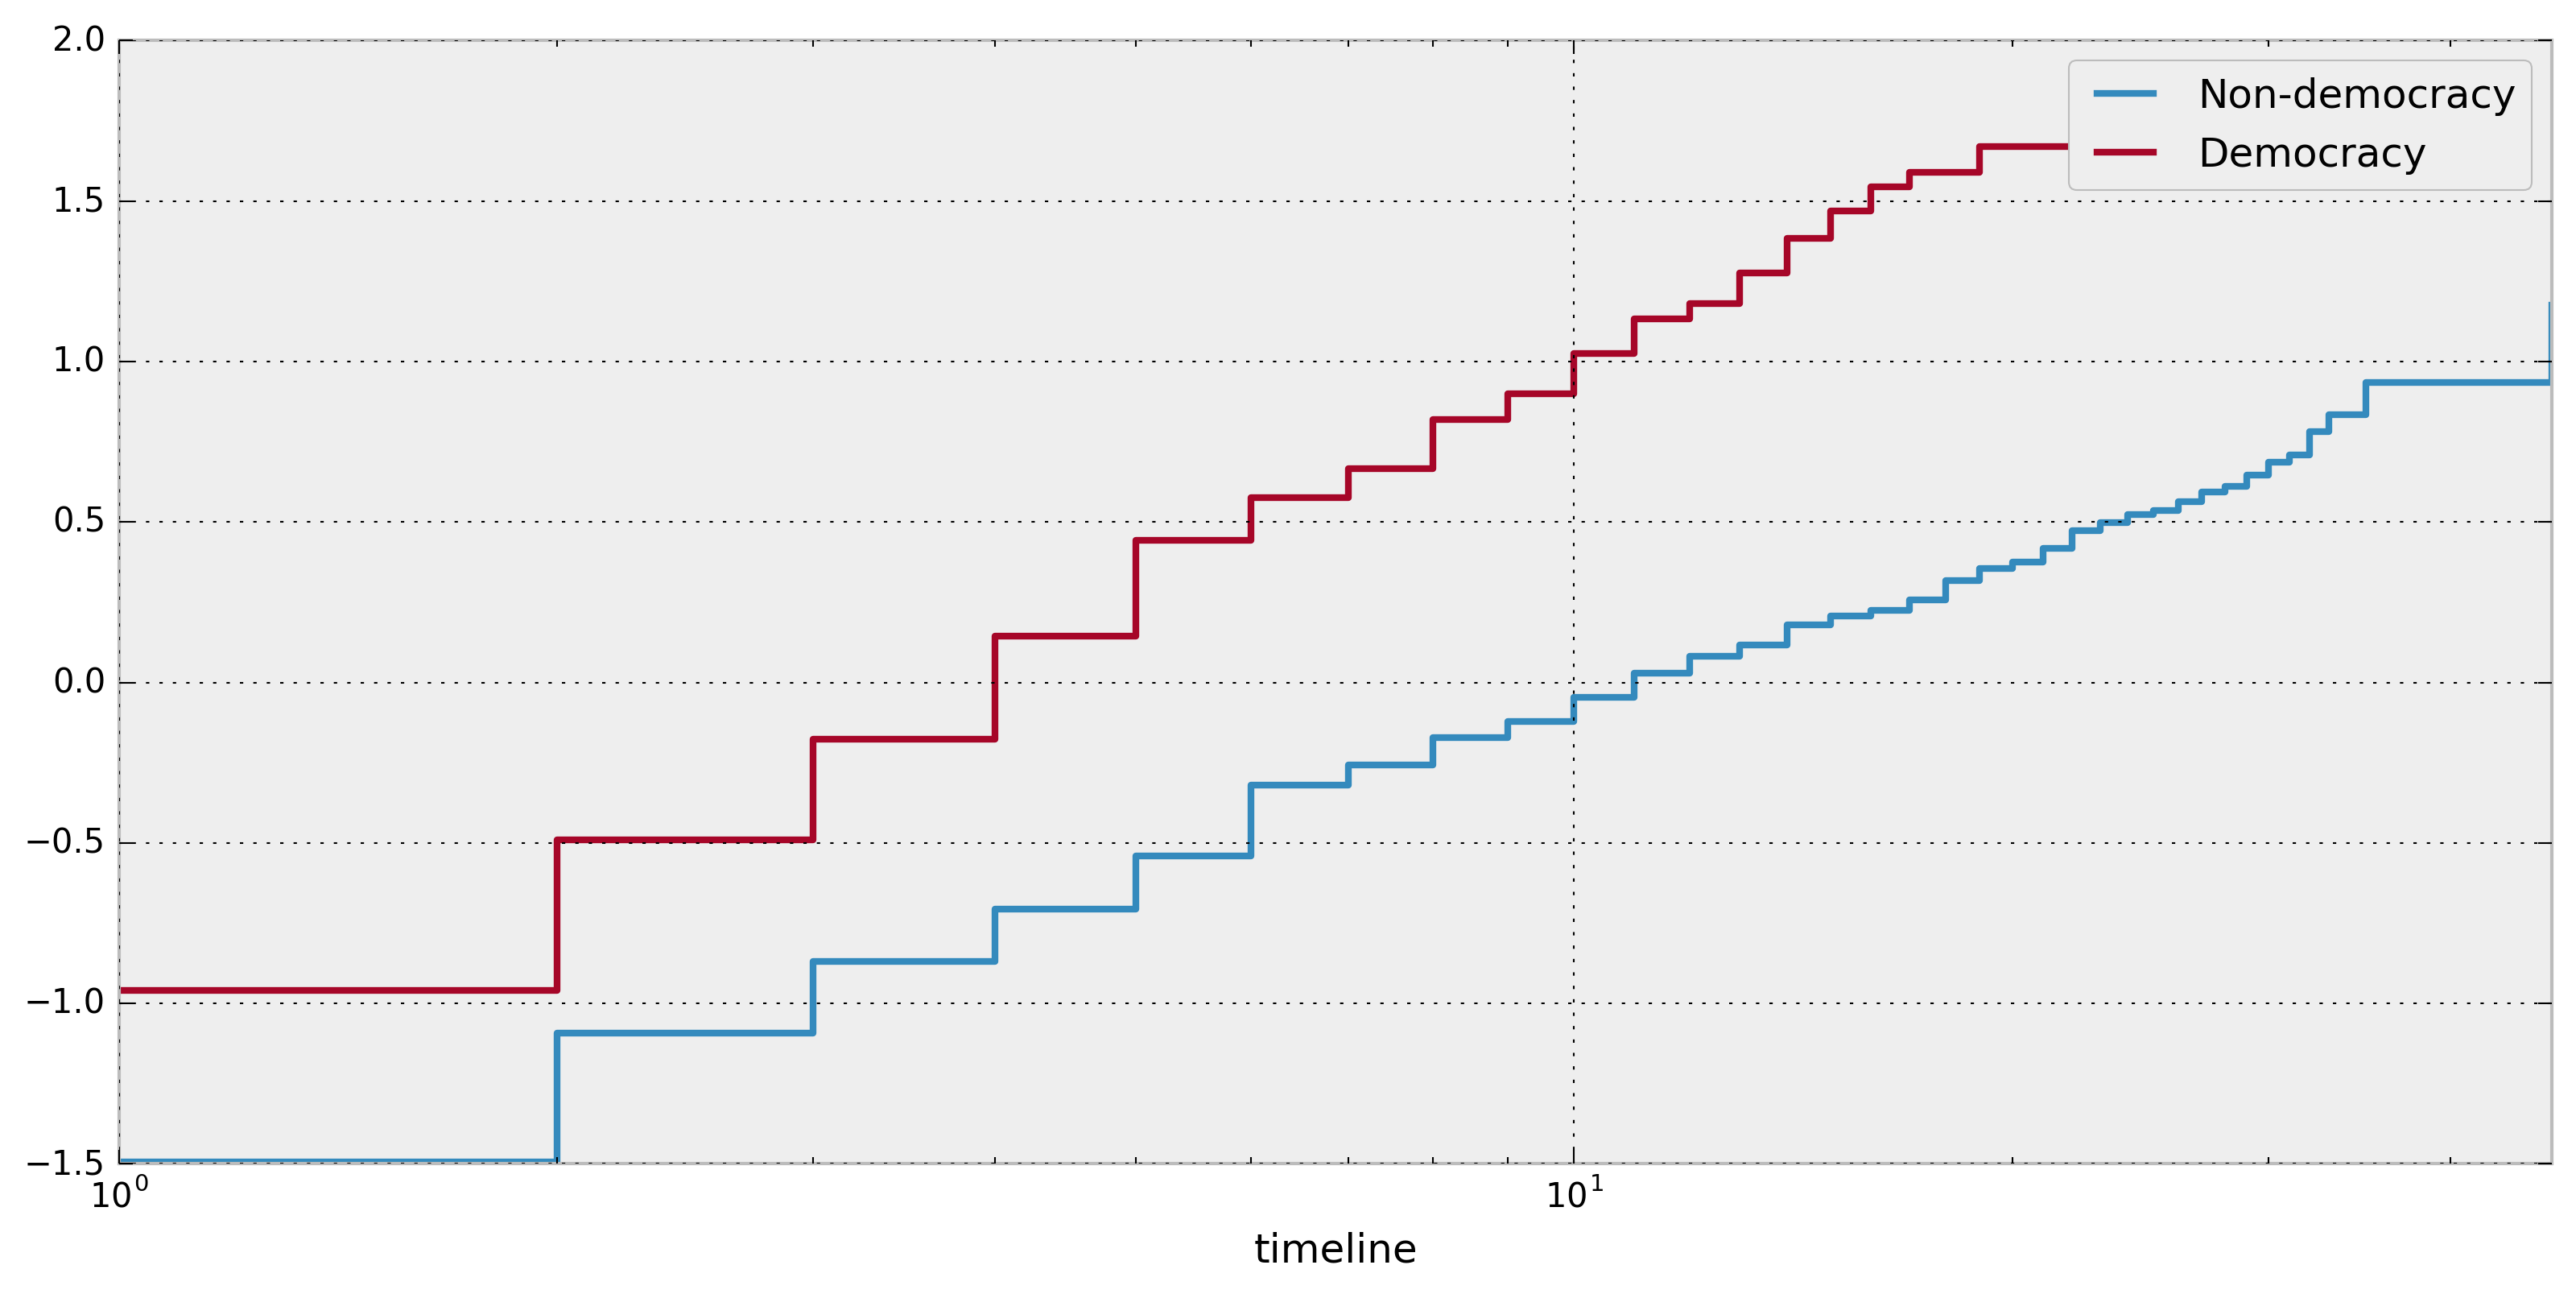

In [51]:
ax = plt.subplot(111)
for democracy in df['democracy'].unique():
    ix = df.democracy == democracy
    kmf.fit(df.ix[ix]['duration'], df.ix[ix]['observed'], label=democracy)
    ax = kmf.plot_loglogs(ax=ax, figsize=(13,6))